# Predicting Type 2 Diabetes using Linear Regression Model

## Afshaan Khan - VR01053

Data set description:

<table>
<thead>
<tr>
<th>Variable</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>Age</td>
<td>Age of the Patient.</td>
</tr>
<tr>    
<td>Gender</td>
<td>Gender of the Patient.</td>
</tr>
<tr>
<td>BMI</td>
<td>Body Mass Index of the patient.</td>
</tr>
<tr>
<td>SBP</td>
<td>Systolic Blood Pressure.</td>
</tr>
<tr>
<td>DBP</td>
<td>Diastolic Blood Pressure</td>
</tr>
<tr>
<td>Chol</td>
<td>Cholesterol</td>
</tr>
<tr>
<td>Tri</td>
<td>Triglyceride</td>
</tr>
<tr>
<td>HDL</td>
<td>High-Density Lipoprotein.</td>
</tr>
<tr>
<td>LDL</td>
<td>Low-Density Lipoprotein.</td>
</tr>
<tr>
<td>ALT</td>
<td>Alanine Aminotransferase.</td>
</tr>
<tr>
<td>BUN</td>
<td>Blood urea nitrogen.</td>
</tr>
<tr>
<td>CCR</td>
<td>Creatinine Clearance.</td>
</tr>
<tr>
<td>FPG</td>
<td>Fasting Plasma Glucose</td>
</tr>
<tr>
<td>FFPG</td>
<td>Final Fasting Plasma Glucose</td>
</tr>
<tr>
<td>smoking(Status)</td>
<td>1: Current Smoker, 2: Ever Smoker, 3: Never Smoker</td>
</tr>
<tr>
<td>drinking(Status)</td>
<td>1: Current Drinker, 2: Ever Drinker, 3: Never Drinker</td>
</tr>
<tr>
<td>family_hist</td>
<td>Family History of Diabetes: 1: Yes, 0: No</td>
</tr>
<tr>
<td>Diabetes</td>
<td>1: Yes, 0: No</td>
</tr>
</tbody>
</table>

# Table of Contents
1. [Business Understanding](#business_understanding)
2. [Objective](#objective)
3. [Importing Libraries](#importing_libraries)
4. [Data Sources](#data_sources)
5. [Data Loading](#data_loading)
6. [Exploratory Data Analysis (EDA)](#eda)
7. [Data Cleaning and Preprocessing](#data_cleaning)
8. [Splitting the Features and Target](#Split)
9. [Model Training](#model_training)
10. [Model Evaluation](#model_evaluation)
11. [Building a Predictive System](#predictive_system)
12. [RMSE](#RMSE)
13. [Conclusion](#Conclusion)

<a id='business_understanding'></a>
## Business Understanding

- Diabetes, a chronic disease affecting millions worldwide, poses significant health and economic challenges. Effective diagnosis tools are crucial for early intervention and management.

- Developing an accurate predictive model to diagnose diabetes can significantly aid healthcare providers in early detection and personalized treatment strategies.

- The primary stakeholders are healthcare professionals, patients, and healthcare systems looking for efficient diagnostic tools.

<a id='objective'></a>
## Objective

- Utilize machine learning techniques to accurately predict the presence of diabetes based on various health indicators and patient data.

- Leverage the 18 features in the dataset, which likely include health metrics and patient demographics, to train a predictive model.

- An effective model that provides accurate predictions, aiding in early and reliable diabetes diagnosis.

<a id='importing_libraries'></a>
## Importing Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

<a id='data_sources'></a>
## Data Sources

diabetes_raw_data = https://datadryad.org/stash/dataset/doi:10.5061/dryad.ft8750v

<a id='data_loading'></a>
## Data Loading

In [25]:
# Loading the dataset to Pandas DataFrame
file_path = 'diabetes_raw_data.csv'
diabetes_raw_data = pd.read_csv(file_path)

<a id='eda'></a>
## EDA (Exploratory Data Analysis)

### General Information about Data

In [26]:
# Displays the first few rows of the DF
diabetes_raw_data.head()

,id,Age (y),"Gender(1, male; 2, female)",site,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),...,AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"Diabetes diagnosed during followup（1,Yes）","censor of diabetes at followup(1, Yes; 0, No)",year of followup,"smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
0,1,43,2,16,166.4,53.5,19.3,96.0,57.0,4.99,...,NaN,3.08,50.3,4.97,NaN,0,2.151951,3.0,3.0,1
1,2,34,1,2,169.0,57.0,20.0,124.0,69.0,3.51,...,NaN,6.13,83.7,5.50,NaN,0,3.969884,NaN,NaN,0
2,3,32,2,2,157.0,51.0,20.7,98.0,68.0,4.25,...,19.5,4.45,42.8,4.90,NaN,0,3.939767,NaN,NaN,0
3,11,59,1,2,165.0,63.0,23.1,136.0,73.0,5.70,...,NaN,5.76,62.6,5.50,NaN,0,2.184805,3.0,3.0,0
4,14,30,2,9,163.5,48.5,18.1,107.0,76.0,4.42,...,19.9,2.51,48.9,4.82,NaN,0,2.026010,NaN,NaN,0


In [27]:
diabetes_raw_data.shape

(211833, 25)

In [28]:
diabetes_raw_data.info

<bound method DataFrame.info of             id  Age (y)  Gender(1, male; 2, female)  site  height(cm)  \
0            1       43                           2    16       166.4   
1            2       34                           1     2       169.0   
2            3       32                           2     2       157.0   
3           11       59                           1     2       165.0   
4           14       30                           2     9       163.5   
...        ...      ...                         ...   ...         ...   
211828  685268       41                           1     2       164.0   
211829  685270       31                           2     5       153.0   
211830  685274       30                           2     2       167.0   
211831  685276       43                           1     5       170.0   
211832  685286       57                           1     4       169.0   

        weight(kg)  BMI(kg/m2)  SBP(mmHg)  DBP(mmHg)  FPG (mmol/L)  ...  \
0             53

In [29]:
diabetes_raw_data.describe()

,id,Age (y),"Gender(1, male; 2, female)",site,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),...,AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"Diabetes diagnosed during followup（1,Yes）","censor of diabetes at followup(1, Yes; 0, No)",year of followup,"smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
count,211833.000000,211833.000000,211833.000000,211833.000000,211831.000000,211833.000000,211833.000000,211810.000000,211809.000000,211833.000000,...,88543.000000,190282.000000,200658.000000,211814.000000,1304.0,211833.000000,211833.000000,60230.000000,60230.000000,211833.000000
mean,343114.275594,42.097567,1.451818,5.846596,166.432212,64.677388,23.235742,119.063467,74.177178,4.915240,...,24.084889,4.657683,70.065176,5.133327,1.0,0.019704,3.122593,2.556550,2.806442,0.020507
std,197768.164898,12.649956,0.497674,3.068889,8.326936,12.223239,3.342934,16.379803,10.813487,0.611792,...,12.362870,1.186493,15.802667,0.687021,0.0,0.138982,0.938764,0.804845,0.448283,0.141726
min,1.000000,20.000000,1.000000,0.000000,106.500000,32.000000,15.000000,59.000000,38.000000,0.590000,...,0.000000,0.100000,13.000000,3.100000,1.0,0.000000,2.001369,1.000000,1.000000,0.000000
25%,171837.000000,32.000000,1.000000,3.000000,160.000000,55.200000,20.800000,107.000000,66.000000,4.530000,...,18.600000,3.810000,58.000000,4.730000,1.0,0.000000,2.162902,3.000000,3.000000,0.000000
50%,343120.000000,39.000000,1.000000,5.000000,166.400000,63.500000,23.000000,118.000000,73.000000,4.900000,...,22.000000,4.530000,69.300000,5.060000,1.0,0.000000,2.989733,3.000000,3.000000,0.000000
75%,514482.000000,50.000000,2.000000,8.000000,172.500000,72.800000,25.380000,129.000000,81.000000,5.300000,...,26.700000,5.370000,80.900000,5.400000,1.0,0.000000,3.945243,3.000000,3.000000,0.000000
max,685286.000000,99.000000,2.000000,16.000000,198.500000,157.000000,52.700000,222.000000,164.000000,6.990000,...,1026.200000,29.400000,1116.600000,29.700000,1.0,1.000000,7.564682,3.000000,3.000000,1.000000


<a id='data_cleaning'></a>
## Data Cleaning and Preprocessing

### NULL Values

In [30]:
print(diabetes_raw_data.columns)

Index(['id', 'Age (y)', 'Gender(1, male; 2, female)', 'site', 'height(cm)',
       'weight(kg)', 'BMI(kg/m2)', 'SBP(mmHg)', 'DBP(mmHg)', 'FPG (mmol/L)',
       'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL-c(mmol/L)',
       'LDL(mmol/L)', 'ALT(U/L)', 'AST(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)',
       'FPG of final visit(mmol/L)',
       'Diabetes diagnosed during followup（1,Yes）',
       'censor of diabetes at followup(1, Yes; 0, No)', 'year of followup',
       'smoking status(1,current smoker;2, ever smoker;3,never smoker)',
       'drinking status(1,current drinker;2, ever drinker;3,never drinker)',
       'family histroy of diabetes(1,Yes;0,No)'],
      dtype='object')


In [31]:
display(diabetes_raw_data.isnull().sum())

id                                                                         0
Age (y)                                                                    0
Gender(1, male; 2, female)                                                 0
site                                                                       0
height(cm)                                                                 2
weight(kg)                                                                 0
BMI(kg/m2)                                                                 0
SBP(mmHg)                                                                 23
DBP(mmHg)                                                                 24
FPG (mmol/L)                                                               0
Cholesterol(mmol/L)                                                     4854
Triglyceride(mmol/L)                                                    4887
HDL-c(mmol/L)                                                          94562

In [32]:
diabetes_raw_data.dropna(subset=['smoking status(1,current smoker;2, ever smoker;3,never smoker)',
                                 'drinking status(1,current drinker;2, ever drinker;3,never drinker)',
                                'HDL-c(mmol/L)',
                                'LDL(mmol/L)',
                                'SBP(mmHg)',
                                'DBP(mmHg)',
                                'ALT(U/L)',
                                'BUN(mmol/L)',
                                'CCR(umol/L)',
                                'FPG of final visit(mmol/L)'],
                                 inplace=True)

In [33]:
diabetes_raw_data['smoking status(1,current smoker;2, ever smoker;3,never smoker)'] = diabetes_raw_data['smoking status(1,current smoker;2, ever smoker;3,never smoker)'].astype(int)
diabetes_raw_data['drinking status(1,current drinker;2, ever drinker;3,never drinker)'] = diabetes_raw_data['drinking status(1,current drinker;2, ever drinker;3,never drinker)'].astype(int)

In [34]:
diabetes_raw_data.head()

,id,Age (y),"Gender(1, male; 2, female)",site,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),...,AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"Diabetes diagnosed during followup（1,Yes）","censor of diabetes at followup(1, Yes; 0, No)",year of followup,"smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
3,11,59,1,2,165.0,63.0,23.1,136.0,73.0,5.70,...,NaN,5.76,62.6,5.50,NaN,0,2.184805,3,3,0
21,66,47,1,3,179.5,86.0,26.7,124.0,72.0,5.08,...,NaN,4.58,69.1,5.23,NaN,0,4.019165,3,3,0
30,93,31,2,5,166.5,52.5,18.9,112.0,70.0,4.16,...,19.0,3.66,56.0,4.30,NaN,0,4.076660,3,3,0
43,139,51,1,8,169.7,77.3,26.8,123.0,80.0,5.60,...,NaN,4.80,63.2,5.60,NaN,0,2.020534,1,3,0
64,213,70,1,3,178.5,78.5,24.6,168.0,97.0,5.49,...,NaN,6.49,98.5,6.50,NaN,0,4.925394,3,3,0


In [35]:
diabetes_raw_data['Diabetes diagnosed during followup（1,Yes）'] = diabetes_raw_data['Diabetes diagnosed during followup（1,Yes）'].fillna(0).astype(int)

In [36]:
diabetes_raw_data.head()

,id,Age (y),"Gender(1, male; 2, female)",site,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),...,AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"Diabetes diagnosed during followup（1,Yes）","censor of diabetes at followup(1, Yes; 0, No)",year of followup,"smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
3,11,59,1,2,165.0,63.0,23.1,136.0,73.0,5.70,...,NaN,5.76,62.6,5.50,0,0,2.184805,3,3,0
21,66,47,1,3,179.5,86.0,26.7,124.0,72.0,5.08,...,NaN,4.58,69.1,5.23,0,0,4.019165,3,3,0
30,93,31,2,5,166.5,52.5,18.9,112.0,70.0,4.16,...,19.0,3.66,56.0,4.30,0,0,4.076660,3,3,0
43,139,51,1,8,169.7,77.3,26.8,123.0,80.0,5.60,...,NaN,4.80,63.2,5.60,0,0,2.020534,1,3,0
64,213,70,1,3,178.5,78.5,24.6,168.0,97.0,5.49,...,NaN,6.49,98.5,6.50,0,0,4.925394,3,3,0


In [37]:
diabetes_raw_data.drop('id', axis=1, inplace=True)

In [38]:
diabetes_raw_data.drop('site', axis=1, inplace=True)

In [39]:
diabetes_raw_data.drop('height(cm)', axis=1, inplace=True)

In [40]:
diabetes_raw_data.drop('weight(kg)', axis=1, inplace=True)

In [41]:
diabetes_raw_data.drop('AST(U/L)', axis=1, inplace=True)

In [42]:
diabetes_raw_data.drop('censor of diabetes at followup(1, Yes; 0, No)', axis=1, inplace=True)

In [43]:
diabetes_raw_data.drop('year of followup', axis=1, inplace=True)

In [ ]:
diabetes_raw_data.drop('AST(U/L)', axis=1, inplace=True)

In [45]:
diabetes_raw_data.head()

,Age (y),"Gender(1, male; 2, female)",BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),Triglyceride(mmol/L),HDL-c(mmol/L),LDL(mmol/L),ALT(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"Diabetes diagnosed during followup（1,Yes）","smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
3,59,1,23.1,136.0,73.0,5.70,4.50,0.75,1.53,2.80,15.0,5.76,62.6,5.50,0,3,3,0
21,47,1,26.7,124.0,72.0,5.08,6.34,1.02,1.49,4.23,28.2,4.58,69.1,5.23,0,3,3,0
30,31,2,18.9,112.0,70.0,4.16,4.20,0.70,1.67,1.87,18.0,3.66,56.0,4.30,0,3,3,0
43,51,1,26.8,123.0,80.0,5.60,5.17,2.77,0.96,2.97,41.2,4.80,63.2,5.60,0,1,3,0
64,70,1,24.6,168.0,97.0,5.49,5.32,1.56,1.16,3.26,26.0,6.49,98.5,6.50,0,3,3,0


In [46]:
print(diabetes_raw_data.columns)

Index(['Age (y)', 'Gender(1, male; 2, female)', 'BMI(kg/m2)', 'SBP(mmHg)',
       'DBP(mmHg)', 'FPG (mmol/L)', 'Cholesterol(mmol/L)',
       'Triglyceride(mmol/L)', 'HDL-c(mmol/L)', 'LDL(mmol/L)', 'ALT(U/L)',
       'BUN(mmol/L)', 'CCR(umol/L)', 'FPG of final visit(mmol/L)',
       'Diabetes diagnosed during followup（1,Yes）',
       'smoking status(1,current smoker;2, ever smoker;3,never smoker)',
       'drinking status(1,current drinker;2, ever drinker;3,never drinker)',
       'family histroy of diabetes(1,Yes;0,No)'],
      dtype='object')


In [47]:
diabetes_raw_data.rename(columns={'Age (y)': 'Age'}, inplace=True)

In [48]:
diabetes_raw_data.rename(columns={'Gender(1, male; 2, female)': 'Gender'}, inplace=True)

In [49]:
diabetes_raw_data.rename(columns={'BMI(kg/m2)': 'BMI'}, inplace=True)

In [50]:
diabetes_raw_data.rename(columns={'SBP(mmHg)': 'SBP'}, inplace=True)

In [51]:
diabetes_raw_data.rename(columns={'DBP(mmHg)': 'DBP'}, inplace=True)

In [52]:
diabetes_raw_data.rename(columns={'FPG (mmol/L)': 'FPG'}, inplace=True)

In [53]:
diabetes_raw_data.rename(columns={'Cholesterol(mmol/L)': 'Chol'}, inplace=True)

In [54]:
diabetes_raw_data.rename(columns={'Triglyceride(mmol/L)': 'Tri'}, inplace=True)

In [55]:
diabetes_raw_data.rename(columns={'HDL-c(mmol/L)': 'HDL'}, inplace=True)

In [56]:
diabetes_raw_data.rename(columns={'LDL(mmol/L)': 'LDL'}, inplace=True)

In [57]:
diabetes_raw_data.rename(columns={'ALT(U/L)': 'ALT'}, inplace=True)

In [58]:
diabetes_raw_data.rename(columns={'BUN(mmol/L)': 'BUN'}, inplace=True)

In [59]:
diabetes_raw_data.rename(columns={'CCR(umol/L)': 'CCR'}, inplace=True)

In [60]:
diabetes_raw_data.rename(columns={'FPG of final visit(mmol/L)': 'FFPG'}, inplace=True)

In [61]:
diabetes_raw_data.rename(columns={'Diabetes diagnosed during followup（1,Yes）': 'Diabetes'}, inplace=True)

In [62]:
diabetes_raw_data.rename(columns={'smoking status(1,current smoker;2, ever smoker;3,never smoker)': 'smoking'}, inplace=True)

In [63]:
diabetes_raw_data.rename(columns={'drinking status(1,current drinker;2, ever drinker;3,never drinker)': 'drinking'}, inplace=True)

In [64]:
diabetes_raw_data.rename(columns={'family histroy of diabetes(1,Yes;0,No)': 'family_hist'}, inplace=True)

In [65]:
cols = [col for col in diabetes_raw_data.columns if col != 'Diabetes']

In [66]:
cols.append('Diabetes')

In [67]:
diabetes_raw_data = diabetes_raw_data[cols]

In [68]:
diabetes_raw_data.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_hist,Diabetes
3,59,1,23.1,136.0,73.0,5.70,4.50,0.75,1.53,2.80,15.0,5.76,62.6,5.50,3,3,0,0
21,47,1,26.7,124.0,72.0,5.08,6.34,1.02,1.49,4.23,28.2,4.58,69.1,5.23,3,3,0,0
30,31,2,18.9,112.0,70.0,4.16,4.20,0.70,1.67,1.87,18.0,3.66,56.0,4.30,3,3,0,0
43,51,1,26.8,123.0,80.0,5.60,5.17,2.77,0.96,2.97,41.2,4.80,63.2,5.60,1,3,0,0
64,70,1,24.6,168.0,97.0,5.49,5.32,1.56,1.16,3.26,26.0,6.49,98.5,6.50,3,3,0,0


In [69]:
display(diabetes_raw_data.isnull().sum())

Age            0
Gender         0
BMI            0
SBP            0
DBP            0
FPG            0
Chol           2
Tri            3
HDL            0
LDL            0
ALT            0
BUN            0
CCR            0
FFPG           0
smoking        0
drinking       0
family_hist    0
Diabetes       0
dtype: int64

In [70]:
diabetes_raw_data.dropna(subset=['Chol','Tri'], inplace=True)

C:\Users\affuk\AppData\Local\Temp\ipykernel_26860\3816352370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_raw_data.dropna(subset=['Chol','Tri'], inplace=True)


In [71]:
display(diabetes_raw_data.isnull().sum())

Age            0
Gender         0
BMI            0
SBP            0
DBP            0
FPG            0
Chol           0
Tri            0
HDL            0
LDL            0
ALT            0
BUN            0
CCR            0
FFPG           0
smoking        0
drinking       0
family_hist    0
Diabetes       0
dtype: int64

In [72]:
diabetes_raw_data.describe()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_hist,Diabetes
count,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000,32306.000000
mean,43.121866,1.350214,23.550018,119.794465,74.952733,4.968396,4.773393,1.449042,1.337247,2.738739,25.423779,4.704557,72.233896,5.185563,2.551105,2.777069,0.056027,0.007862
std,12.620067,0.477044,3.302193,15.832715,10.501398,0.616418,0.892058,1.086600,0.307220,0.684728,21.272346,1.164046,15.219120,0.650105,0.809748,0.475965,0.229977,0.088322
min,20.000000,1.000000,15.000000,72.000000,40.000000,1.990000,1.650000,0.000000,0.000000,0.010000,0.400000,0.900000,27.700000,3.250000,1.000000,1.000000,0.000000,0.000000
25%,33.000000,1.000000,21.200000,108.000000,67.000000,4.590000,4.140000,0.800000,1.120000,2.260000,13.800000,3.890000,60.400000,4.800000,3.000000,3.000000,0.000000,0.000000
50%,40.000000,1.000000,23.400000,119.000000,74.000000,4.980000,4.700000,1.170000,1.320000,2.680000,19.600000,4.600000,72.700000,5.100000,3.000000,3.000000,0.000000,0.000000
75%,51.000000,2.000000,25.700000,130.000000,82.000000,5.340000,5.310000,1.750000,1.530000,3.150000,29.400000,5.400000,82.900000,5.440000,3.000000,3.000000,0.000000,0.000000
max,93.000000,2.000000,44.000000,213.000000,143.000000,6.990000,13.230000,32.640000,10.400000,9.310000,511.600000,14.640000,214.400000,20.600000,3.000000,3.000000,1.000000,1.000000


In [73]:
diabetes_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32306 entries, 3 to 211832
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          32306 non-null  int64  
 1   Gender       32306 non-null  int64  
 2   BMI          32306 non-null  float64
 3   SBP          32306 non-null  float64
 4   DBP          32306 non-null  float64
 5   FPG          32306 non-null  float64
 6   Chol         32306 non-null  float64
 7   Tri          32306 non-null  float64
 8   HDL          32306 non-null  float64
 9   LDL          32306 non-null  float64
 10  ALT          32306 non-null  float64
 11  BUN          32306 non-null  float64
 12  CCR          32306 non-null  float64
 13  FFPG         32306 non-null  float64
 14  smoking      32306 non-null  int32  
 15  drinking     32306 non-null  int32  
 16  family_hist  32306 non-null  int64  
 17  Diabetes     32306 non-null  int32  
dtypes: float64(12), int32(3), int64(3)
memory usa

In [74]:
diabetes_raw_data.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_hist,Diabetes
3,59,1,23.1,136.0,73.0,5.70,4.50,0.75,1.53,2.80,15.0,5.76,62.6,5.50,3,3,0,0
21,47,1,26.7,124.0,72.0,5.08,6.34,1.02,1.49,4.23,28.2,4.58,69.1,5.23,3,3,0,0
30,31,2,18.9,112.0,70.0,4.16,4.20,0.70,1.67,1.87,18.0,3.66,56.0,4.30,3,3,0,0
43,51,1,26.8,123.0,80.0,5.60,5.17,2.77,0.96,2.97,41.2,4.80,63.2,5.60,1,3,0,0
64,70,1,24.6,168.0,97.0,5.49,5.32,1.56,1.16,3.26,26.0,6.49,98.5,6.50,3,3,0,0


In [75]:
diabetes_raw_data.shape    

(32306, 18)

In [76]:
file_path = 'diabetes.csv'
diabetes_data = pd.read_csv(file_path)

In [77]:
diabetes_data.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3,3,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1,1,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3,3,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2,3,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3,3,0,0


In [78]:
diabetes_data.shape

(4303, 18)

In [79]:
display(diabetes_data.isnull().sum())

Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64

## Data Visualization

#### Age Distribution of patients 

C:\Users\affuk\AppData\Local\Temp\ipykernel_26860\997364449.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['Age'])


<function matplotlib.pyplot.show(close=None, block=None)>

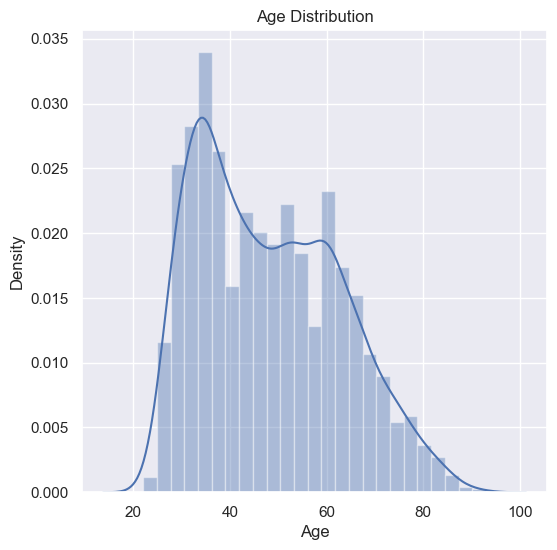

In [80]:
# distribution of Age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(diabetes_data['Age'])
plt.title('Age Distribution')
plt.show

#### Gender Distribution of patients

<function matplotlib.pyplot.show(close=None, block=None)>

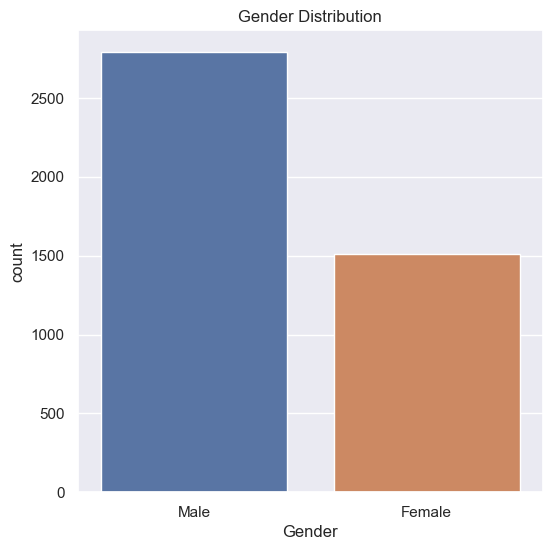

In [81]:
# gender distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data=diabetes_data)
plt.xticks([0,1],['Male','Female'])
plt.title('Gender Distribution')
plt.show

In [82]:
diabetes_data['Gender'].value_counts()

1    2790
2    1513
Name: Gender, dtype: int64

- to know the exact value count of Gender we can use (.value_counts) function

#### BMI Distribution

C:\Users\affuk\AppData\Local\Temp\ipykernel_26860\2111266193.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['BMI'])


<function matplotlib.pyplot.show(close=None, block=None)>

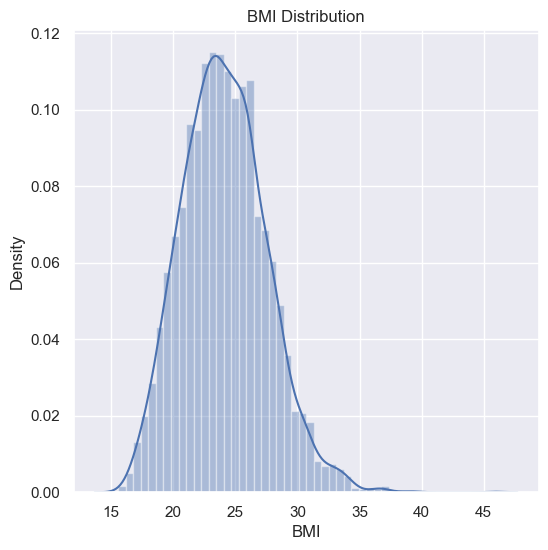

In [83]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(diabetes_data['BMI'])
plt.title('BMI Distribution')
plt.show

- Normal BMI range --> 18.5 to 24.9

#### SBP(Systolic Blood Pressure) Distribution

C:\Users\affuk\AppData\Local\Temp\ipykernel_26860\511379936.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['SBP'])


<function matplotlib.pyplot.show(close=None, block=None)>

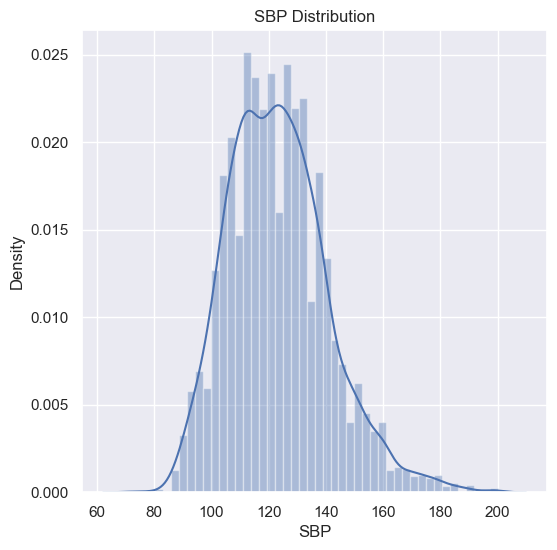

In [84]:
# sbp distribution
plt.figure(figsize=(6,6))
sns.distplot(diabetes_data['SBP'])
plt.title('SBP Distribution')
plt.show

 #### Systolic Blood Pressure Ranges
- Normal --> Less than 120
- Elevated --> 120-129
- High blood pressure (hypertension) Stage 1 --> 130-139
- High blood pressure (hypertension) Stage 2 --> 140 or higher
- Hypertensive crisis --> Higher than 180

#### DBP(Diastolic Blood Pressure) Distribution

C:\Users\affuk\AppData\Local\Temp\ipykernel_26860\1328575264.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['DBP'])


<function matplotlib.pyplot.show(close=None, block=None)>

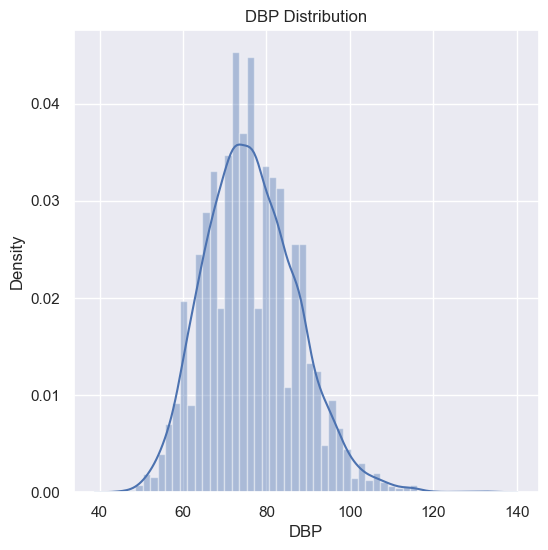

In [85]:
# dbp distribution
plt.figure(figsize=(6,6))
sns.distplot(diabetes_data['DBP'])
plt.title('DBP Distribution')
plt.show

 #### Diastolic Blood Pressure Ranges
- Normal --> Less than 80
- Elevated --> Less than 80
- High blood pressure (hypertension) Stage 1 --> 80-89
- High blood pressure (hypertension) Stage 2 --> 90 or higher
- Hypertensive crisis --> Higher than 120

#### FPG(Fasting Plasma Glucose) Distribution

C:\Users\affuk\AppData\Local\Temp\ipykernel_26860\853234229.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['FPG'])


<function matplotlib.pyplot.show(close=None, block=None)>

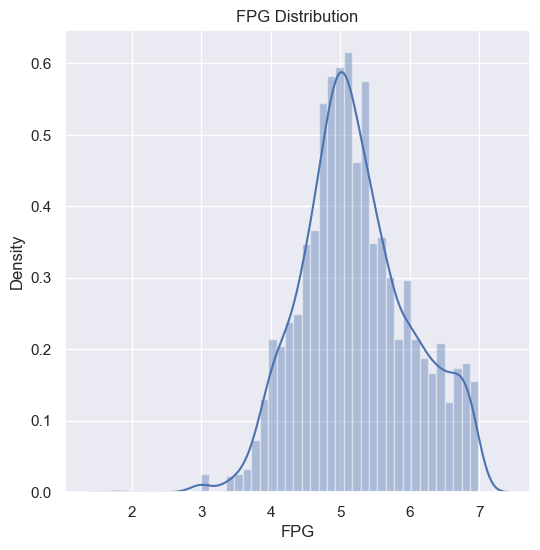

In [86]:
# fpg distribution
plt.figure(figsize=(6,6))
sns.distplot(diabetes_data['FPG'])
plt.title('FPG Distribution')
plt.show

#### Fasting Plasma Glucose Ranegs
- When fasting blood glucose is between 5.6 to 6.9
- If fasting blood glucose is 7 or higher, diabetes is diagnosed.
- An individual with low fasting blood glucose concentration (hypoglycemia) – below 3.9

#### Cholestrol Distribution

C:\Users\affuk\AppData\Local\Temp\ipykernel_26860\3082953150.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['Chol'])


<function matplotlib.pyplot.show(close=None, block=None)>

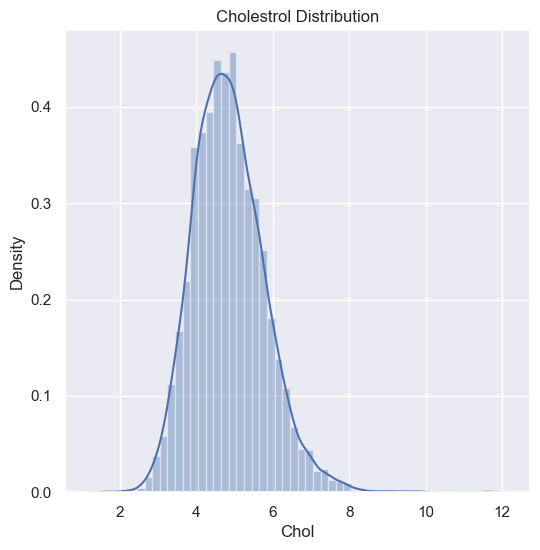

In [87]:
# cholestrol distribution
plt.figure(figsize=(6,6))
sns.distplot(diabetes_data['Chol'])
plt.title('Cholestrol Distribution')
plt.show

### Cholestrol levels
- A total cholesterol level of less than 5.17 is normal.
- A total cholesterol level of 5.17 to 6.18 is borderline high.
- A total cholesterol level of 6.21 or greater is high.

#### Triglyceride Distribution

C:\Users\affuk\AppData\Local\Temp\ipykernel_26860\1676396006.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['Tri'])


<function matplotlib.pyplot.show(close=None, block=None)>

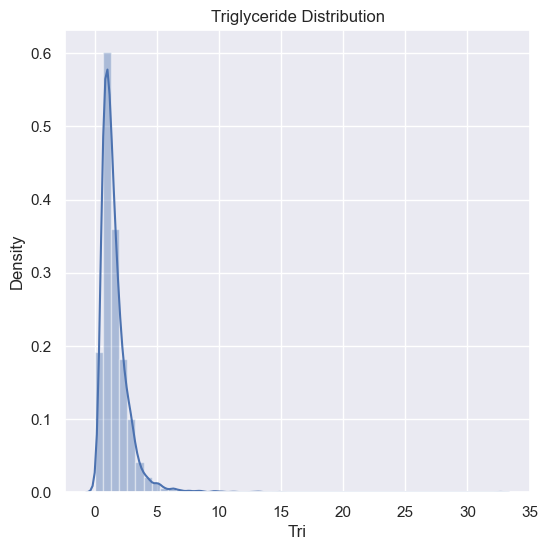

In [88]:
# triglyceride distribution
plt.figure(figsize=(6,6))
sns.distplot(diabetes_data['Tri'])
plt.title('Triglyceride Distribution')
plt.show

#### Triglyceride Ranges
- Normal — Less than 1.7 millimoles per liter
- Borderline high — 1.8 to 2.2 
- High — 2.3 to 5.6
- Very high — 5.7 or above)

#### ALT(Alanine Aminotransferase) Distribution

C:\Users\affuk\AppData\Local\Temp\ipykernel_26860\1410460572.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['ALT'])


<function matplotlib.pyplot.show(close=None, block=None)>

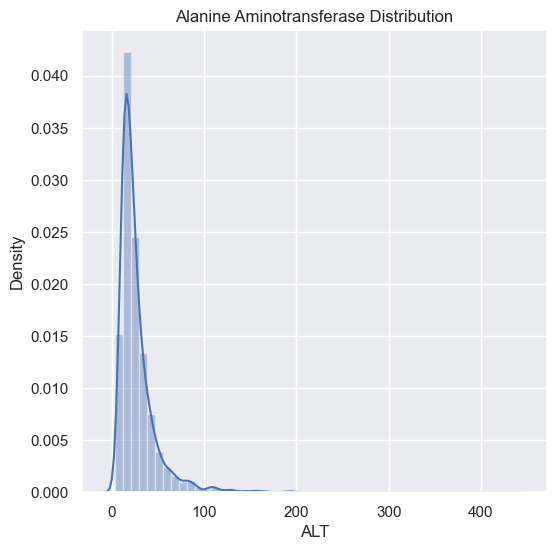

In [89]:
# Alanine Aminotransferase distribution
plt.figure(figsize=(6,6))
sns.distplot(diabetes_data['ALT'])
plt.title('Alanine Aminotransferase Distribution')
plt.show

- Normal serum alanine aminotransferase (ALT) is 7-56 U/L.

#### BUN(Blood Urea Nitrogen) Distribution

C:\Users\affuk\AppData\Local\Temp\ipykernel_26860\3779630905.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['BUN'])


<function matplotlib.pyplot.show(close=None, block=None)>

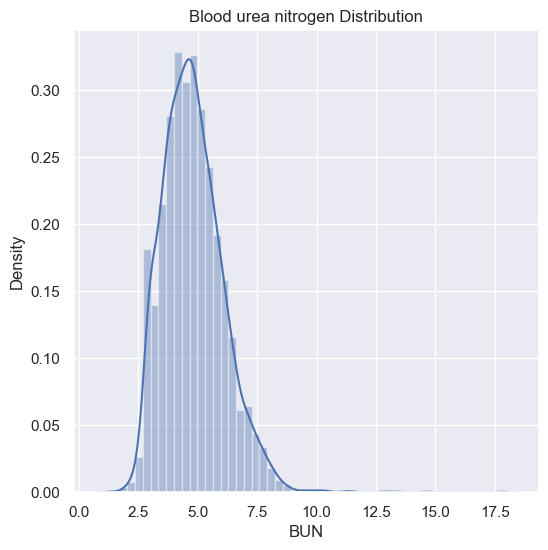

In [90]:
# Blood urea nitrogen distribution
plt.figure(figsize=(6,6))
sns.distplot(diabetes_data['BUN'])
plt.title('Blood urea nitrogen Distribution')
plt.show

- The normal range of urea nitrogen in blood or serum is 1.8 to 7.1 mmol urea per liter.

#### CCR(Creatinine Clearance) Distribution

C:\Users\affuk\AppData\Local\Temp\ipykernel_26860\2502117167.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['CCR'])


<function matplotlib.pyplot.show(close=None, block=None)>

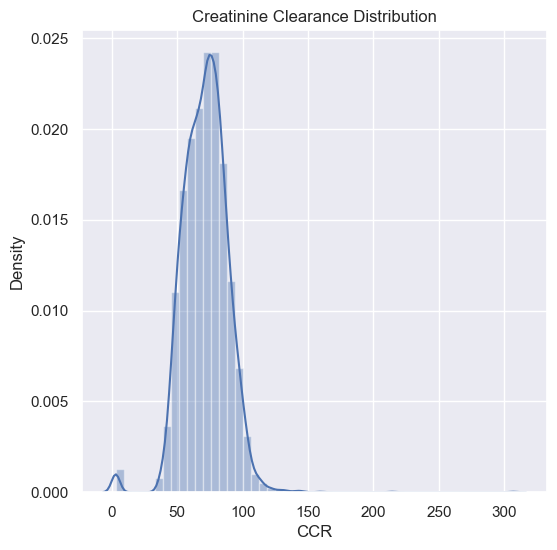

In [91]:
# Creatinine Clearance distribution
plt.figure(figsize=(6,6))
sns.distplot(diabetes_data['CCR'])
plt.title('Creatinine Clearance Distribution')
plt.show

- The normal range of CrCl is 110 to 150mL/min in males and 100 to 130mL/min in females.

#### Drinking Status Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

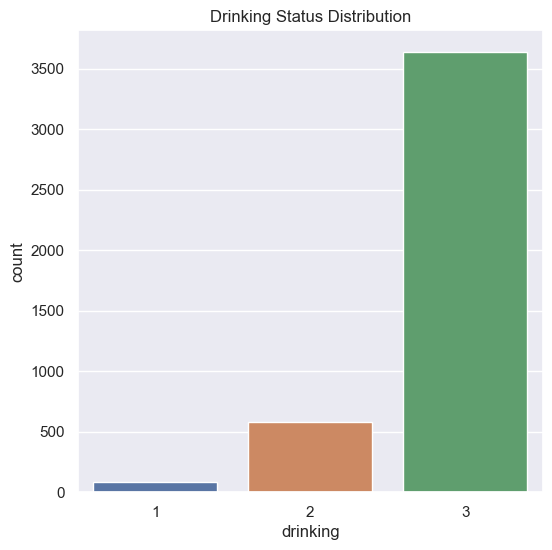

In [92]:
# Drinking Status distribution
plt.figure(figsize=(6,6))
sns.countplot(x='drinking', data=diabetes_data)
plt.title('Drinking Status Distribution')
plt.show

In [93]:
print(diabetes_data['drinking'].unique())

[3 1 2]


#### Family History of Diabetes Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

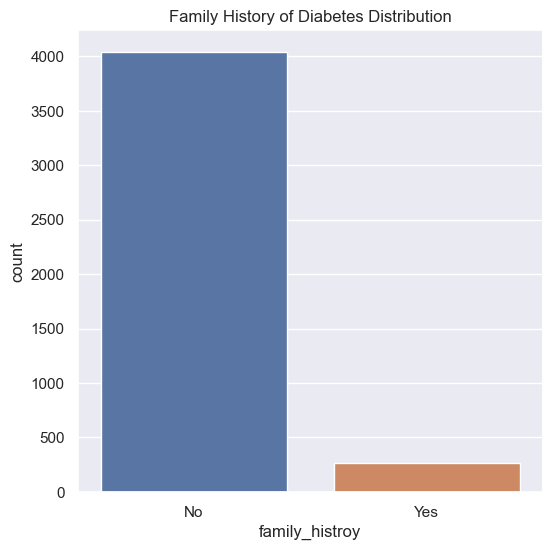

In [94]:
# Family History of Diabetes distribution
plt.figure(figsize=(6,6))
sns.countplot(x='family_histroy', data=diabetes_data)
plt.xticks([0,1],['No','Yes'])
plt.title('Family History of Diabetes Distribution')
plt.show

#### Type 2 Diabetes Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

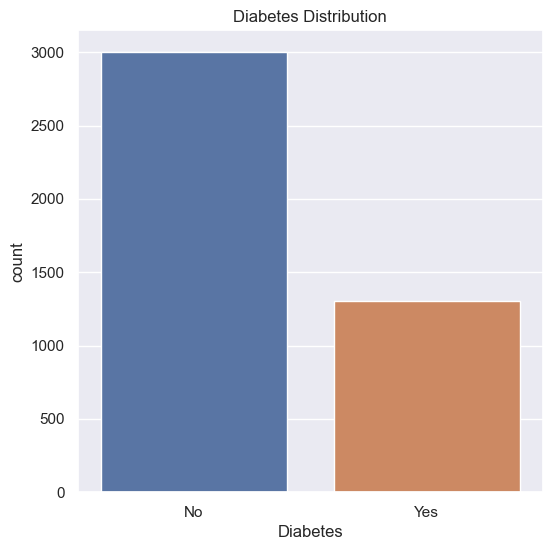

In [95]:
# Diabetes distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Diabetes', data=diabetes_data)
plt.xticks([0,1],['No','Yes'])
plt.title('Diabetes Distribution')
plt.show

In [97]:
diabetes_data.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3,3,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1,1,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3,3,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2,3,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3,3,0,0


## Correlation analysis

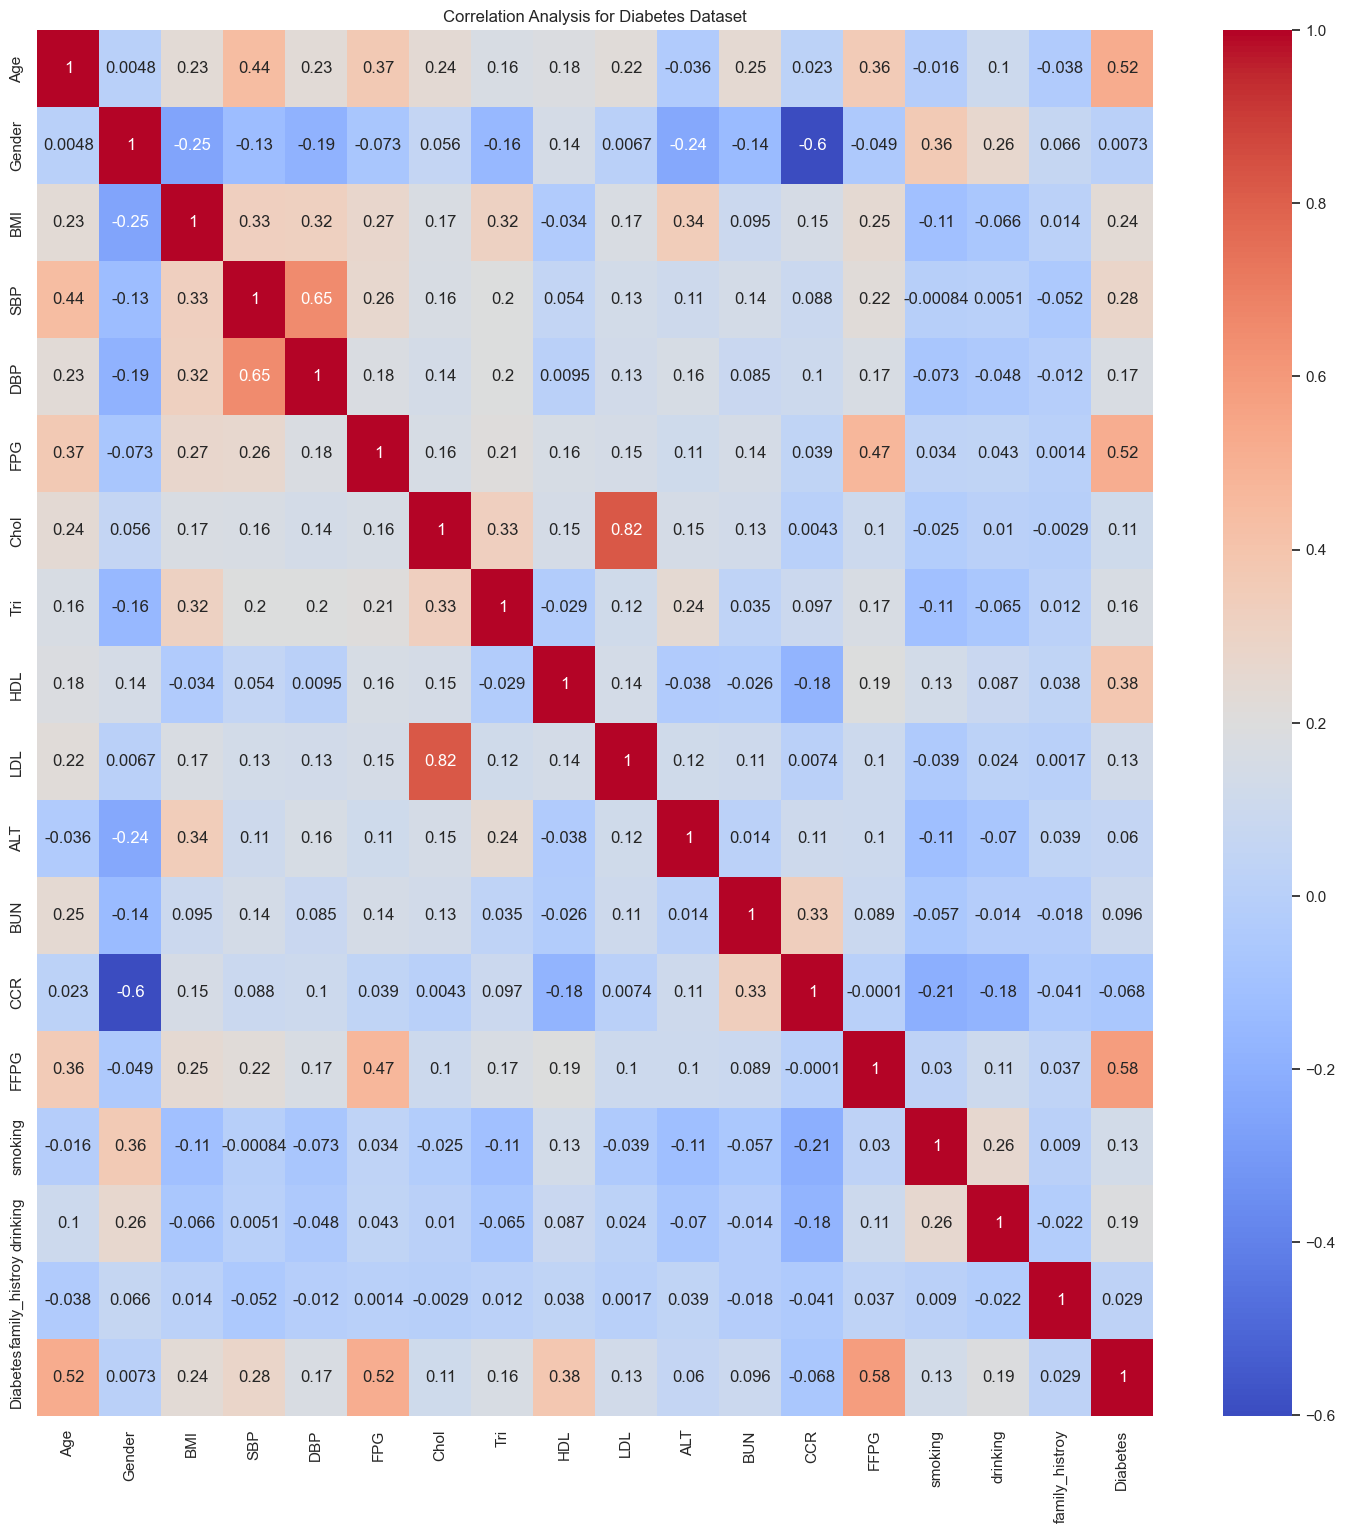

In [140]:
correlation_matrix = diabetes_data.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis for Diabetes Dataset')
plt.show()

<a id='Split'></a>
## Splitting the Features and Target

In [99]:
X = diabetes_data.drop(columns='Diabetes', axis=1)
Y = diabetes_data['Diabetes']

In [101]:
X

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3,3,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1,1,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3,3,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2,3,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,54,1,23.4,126,75,6.82,5.00,1.50,1.24,2.98,8.0,3.50,77.0,6.70,1,3,0
4299,50,2,22.3,115,84,5.32,4.37,2.09,1.37,2.29,21.2,4.40,47.3,6.55,3,3,0
4300,67,1,24.6,138,81,4.85,3.89,1.38,1.14,2.17,18.1,4.73,70.6,6.80,3,3,0
4301,60,2,29.0,101,60,6.70,5.91,1.29,1.73,2.85,18.9,7.33,50.2,7.00,3,3,0


In [102]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4298    1
4299    1
4300    1
4301    1
4302    1
Name: Diabetes, Length: 4303, dtype: int64

### Splitting the data into Training data and Testing data

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [104]:
print(X.shape, X_train.shape, X_test.shape)

(4303, 17) (3442, 17) (861, 17)


<a id='model_training'></a>
## Model Training

### Linear Regression

In [131]:
# loading the Linear Regression model
regressor = LinearRegression()

In [132]:
regressor.fit(X_train, Y_train)

LinearRegression()

<a id='model_evaluation'></a>
### Model Evaluation

In [133]:
# prediction on training data 
training_data_prediction = regressor.predict(X_train)

In [134]:
from sklearn import metrics

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.5769501272861468


In [143]:
# prediction on test data 
test_data_prediction = regressor.predict(X_test)

In [144]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.5314693907578772


<a id='predictive_system'></a>
### Building a Predictive System

In [148]:
input_data = (60,1,28.7,132,80,4.6,5.6,1.45,1.02,3.38,40,5.7,68.3,4.6,1,2,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the array 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

if prediction[0] < 0.5:
    print("this patient is not diagnosed with type 2 diabetes")
else:
    print("has diagnosed with type 2 Diabetes")

[0.0077671]
this patient is not diagnosed with type 2 diabetes


C:\Users\affuk\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [151]:
input_data = (67,1,25,162,83,6.9,4.9,2.7,1.26,3.15,38,7.42,103,7.4,3,3,0)

input_data_as_numpy_array = np.asarray(input_data)
 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

if prediction[0] < 0.5:
    print("this patient is not diagnosed with type 2 diabetes")
else:
    print("has diagnosed with type 2 Diabetes")

[0.86162319]
has diagnosed with type 2 Diabetes


C:\Users\affuk\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<a id='RMSE'></a>

## Root Mean Squared Error (RMSE)

In [141]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(Y_test, test_data_prediction))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.31107679167402397


<a id='Conclusion'></a>
## Conclusion

In this project, a linear regression model was built to predict the occurrence of Type 2 diabetes using a range of health indicators. The model's performance, as measured by the Root Mean Squared Error (RMSE), it gives a decent level of predictive accuracy. However, the findings highlight the complexity and challenge of predicting medical conditions like diabetes. Future improvements could include exploring more sophisticated models or incorporating a broader range of predictive variables. This study illustrates the potential of machine learning in enhancing healthcare diagnostics but also points to the necessity of continuous model refinement for better accuracy and reliability in medical predictions.